In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file= pd.read_csv("D:\Acmegrade\Files\Height_Weight_Dataset.csv")
file

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,179
67,77,182
68,78,186
69,79,178


In [3]:
x= file.iloc[:,:-1].values
y= file.iloc[:,-1].values

In [4]:
x

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80]], dtype=int64)

In [5]:
y

array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142,
       142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 178, 180, 183, 180, 188, 179, 182, 182, 180,
       178, 179, 182, 186, 178, 175], dtype=int64)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
poly4=poly.fit_transform(x)
print(pd.DataFrame(poly4))

      0     1       2         3           4             5             6
0   1.0  10.0   100.0    1000.0     10000.0  1.000000e+05  1.000000e+06
1   1.0  11.0   121.0    1331.0     14641.0  1.610510e+05  1.771561e+06
2   1.0  12.0   144.0    1728.0     20736.0  2.488320e+05  2.985984e+06
3   1.0  13.0   169.0    2197.0     28561.0  3.712930e+05  4.826809e+06
4   1.0  14.0   196.0    2744.0     38416.0  5.378240e+05  7.529536e+06
..  ...   ...     ...       ...         ...           ...           ...
66  1.0  76.0  5776.0  438976.0  33362176.0  2.535525e+09  1.926999e+11
67  1.0  77.0  5929.0  456533.0  35153041.0  2.706784e+09  2.084224e+11
68  1.0  78.0  6084.0  474552.0  37015056.0  2.887174e+09  2.251996e+11
69  1.0  79.0  6241.0  493039.0  38950081.0  3.077056e+09  2.430875e+11
70  1.0  80.0  6400.0  512000.0  40960000.0  3.276800e+09  2.621440e+11

[71 rows x 7 columns]


In [7]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(poly4,y,test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
pred= lr.predict(x_test)
pred

array([169.87806778, 164.19914678, 180.71084679, 156.32381295,
       141.1605115 , 140.91139382, 152.1616751 , 137.92979734,
       182.52822658, 142.34731844, 143.96041564, 182.5776673 ,
       179.11570389, 146.62268734, 181.55495712])

In [10]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,pred)

In [11]:
acc

0.9807933649553628

In [12]:
final=lr.predict(poly4)

In [13]:
acc=r2_score(y,final)
acc


0.9892735256067632

In [14]:
df_pred=pd.DataFrame(final, columns=["Predicted Output"])
result= pd.concat([file,df_pred], axis=1)
result

,Age,Height,Predicted Output
0,10,138,137.262116
1,11,138,137.929797
2,12,138,138.480658
3,13,139,138.937433
4,14,139,139.320264
...,...,...,...
66,76,179,182.201306
67,77,182,181.554957
68,78,186,180.543185
69,79,178,179.115704


<function matplotlib.pyplot.show(close=None, block=None)>

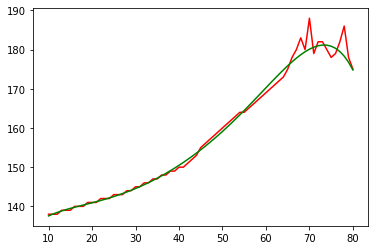

In [16]:
plt.plot(x,y, color="r")
plt.plot(x,final, color="g")
plt.show

In [17]:
result.to_excel("D:\Acmegrade\Outputs\Polynomial_Regression.xlsx")

In [16]:
pred= lr.predict([100])
pred

ValueError: Expected 2D array, got 1D array instead:
array=[100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.